In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
image_dir = '../input/food-101/food-101/food-101/images'
image_size = [224, 224]
batch_size = 32
epochs = 80

In [3]:
inc = InceptionV3(input_shape=image_size + [3], weights='imagenet', include_top=False)

for layer in inc.layers:
  layer.trainable = False
  
x = Flatten()(inc.output)

#x = Dense(101*2, activation="relu")(x)
#x = Dense(101*2, activation="relu")(x)

prediction = Dense(101, activation='softmax')(x)

# create a model object
model = Model(inputs=inc.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy', 'top_k_categorical_accuracy']
)

87916544/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_____________________________

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
horizontal_flip = False,
fill_mode = "nearest",
zoom_range = 0,
width_shift_range = 0,
height_shift_range=0,
rotation_range=0,
validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    image_dir,
    target_size=(image_size[0], image_size[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

num_of_classes = len(train_generator.class_indices)

validation_generator = train_datagen.flow_from_directory(
    image_dir,
    target_size=(image_size[0], image_size[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

r = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 10)

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
2525/2525 [==============================] - 873s 343ms/step - loss: 24.6658 - accuracy: 0.2917 - top_k_categorical_accuracy: 0.5208 - val_loss: 27.9541 - val_accuracy: 0.3883 - val_top_k_categorical_accuracy: 0.6678
Epoch 2/10
2525/2525 [==============================] - 510s 202ms/step - loss: 16.0168 - accuracy: 0.5442 - top_k_categorical_accuracy: 0.8022 - val_loss: 30.1411 - val_accuracy: 0.4242 - val_top_k_categorical_accuracy: 0.6821
Epoch 3/10
2525/2525 [==============================] - 515s 204ms/step - loss: 11.7704 - accuracy: 0.6443 - top_k_categorical_accuracy: 0.8814 - val_loss: 34.2146 - val_accuracy: 0.4274 - val_top_k_categorical_accuracy: 0.6975
Epoch 4/10
2525/2525 [==============================] - 515s 204ms/step - loss: 9.0894 - accuracy: 0.7151 - top_k_categorical_accuracy: 0.9249 - val_loss: 38.8391 - val_accuracy: 0.4222 - val_top_k_categorical_accuracy: 0.6933
Epoch 5/10
2525/2525 [==============================] - 531s 210ms/step - loss: 7.3705 - 

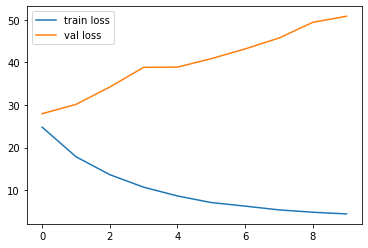

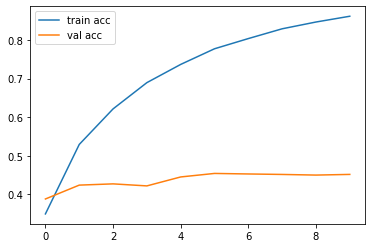

<Figure size 432x288 with 0 Axes>

In [5]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [6]:
model.save('food_classifier.h5')